In [1]:
import os
import numpy as np
import pandas as pd

#set working directory
current_working_dir = os.getcwd()
training_ds_dir = "training_setA"

training_setA_path = os.path.join(current_working_dir, training_ds_dir)

# get list of files
files = [f for f in os.listdir(training_setA_path) if os.path.isfile(os.path.join(training_setA_path, f))]

files = files[:100]

# build list of dataframes, adding "id" column
dfs_a = [pd.read_csv(os.path.join(training_setA_path, f), sep='|', index_col=None).assign(id=f[1:7]) for f in files] 

# concatenate dataframes into one
df_a = pd.concat(dfs_a, sort=False, ignore_index= True)

# write to csv
df_a.to_csv('train_a.csv', index=False)

# read into dataframe
train_a_df = pd.read_csv('train_a.csv', sep= ',')


In [2]:
current_working_dir = os.getcwd()
training_ds_dir_new = "training_setB"
# training_ds_dir_new = "test_b"
training_setB_path = os.path.join(current_working_dir, training_ds_dir_new)
files = [f for f in os.listdir(training_setB_path) if os.path.isfile(os.path.join(training_setB_path, f))]

files = files[:100]

# build list of dataframes, adding "id" column
dfs_b = [pd.read_csv(os.path.join(training_setB_path, f), sep='|', index_col=None).assign(id=f[1:7]) for f in files]
# concatenate dataframes into one
df_b = pd.concat(dfs_b, sort=False, ignore_index= True)
# write to csv
df_b.to_csv('train_b.csv', index=False)
# read into dataframe
test_b_df = pd.read_csv('train_b.csv', sep= ',')

test_b_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,59,1,1.0,0.0,-6.01,1,0,116812
1,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,59,1,1.0,0.0,-6.01,2,0,116812
2,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,NaN,...,NaN,NaN,59,1,1.0,0.0,-6.01,3,0,116812
3,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,NaN,...,NaN,NaN,59,1,1.0,0.0,-6.01,4,0,116812
4,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,NaN,...,NaN,276.0,59,1,1.0,0.0,-6.01,5,0,116812


In [3]:
train_a_df.fillna(0, inplace=True)
test_b_df.fillna(0, inplace=True)

In [4]:
train_a_df['SepsisLabel'].value_counts()

0    3730
1      55
Name: SepsisLabel, dtype: int64

([<matplotlib.axis.XTick at 0x1161afad0>,
 <a list of 2 Text xticklabel objects>)

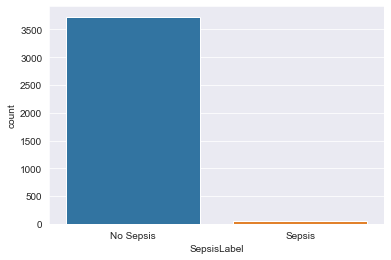

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')

# countplot to see the level of sepsis
sns.countplot(x='SepsisLabel', data= train_a_df)
Labels= ('No Sepsis', 'Sepsis')
plt.xticks(range(2), Labels)

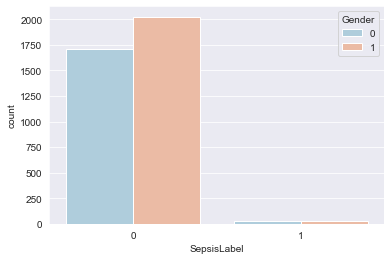

In [6]:
sns.countplot(x='SepsisLabel', hue='Gender', data= train_a_df, palette='RdBu_r')

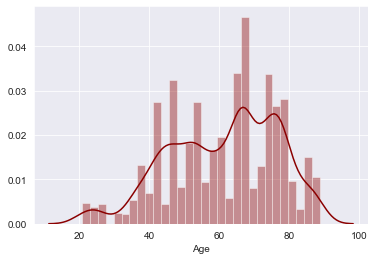

In [7]:
# age distribution of the patients
sns.distplot(train_a_df['Age'].dropna(), color='darkred', bins= 30)

In [8]:
X_train = train_a_df.drop(['SepsisLabel'], axis=1).values
y_train = train_a_df['SepsisLabel'].values

X_test = test_b_df.drop(['SepsisLabel'], axis=1).values
y_test = test_b_df['SepsisLabel'].values

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

log_reg = LogisticRegression(solver='lbfgs')

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

accuracy_val = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)

print('the confusion matrix i : \n', cm)
print('the classification report : \n', classification_report(y_test, y_pred))
print('accuracy_score on test dataset : ', accuracy_val)

the confusion matrix i : 
 [[4250    1]
 [  49    0]]
the classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4251
           1       0.00      0.00      0.00        49

    accuracy                           0.99      4300
   macro avg       0.49      0.50      0.50      4300
weighted avg       0.98      0.99      0.98      4300

accuracy_score on test dataset :  0.9883720930232558


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

y_pred_prob = log_reg.predict_proba(X_test)[:,1]

In [11]:
def predict_threshold (model,X_test,thresholds):
    
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)


for thr in np.arange(0.0,1.0,0.1):
    y_predict = predict_threshold(log_reg,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[   0 4251]
 [   0   49]]
Threshold : 0.1
[[4250    1]
 [  49    0]]
Threshold : 0.2
[[4250    1]
 [  49    0]]
Threshold : 0.30000000000000004
[[4250    1]
 [  49    0]]
Threshold : 0.4
[[4250    1]
 [  49    0]]
Threshold : 0.5
[[4250    1]
 [  49    0]]
Threshold : 0.6000000000000001
[[4250    1]
 [  49    0]]
Threshold : 0.7000000000000001
[[4250    1]
 [  49    0]]
Threshold : 0.8
[[4251    0]
 [  49    0]]
Threshold : 0.9
[[4251    0]
 [  49    0]]


The AUROC score : 0.898640896019664


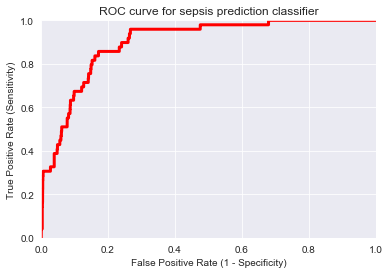

In [12]:
tpr,fpr,thresholds = roc_curve(y_test, y_pred_prob)
log_roc_scr = roc_auc_score(y_test, y_pred_prob)
print("The AUROC score :", log_roc_scr)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for sepsis prediction classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color='red', lw=3)
plt.show()

In [13]:
y_test = pd.DataFrame(y_test, index=None, columns=['SepsisLabel'])
y_test.to_csv('scoring_labels' + '.psv', sep='|', index=False) 


prob_df = pd.DataFrame(y_pred_prob,index=None, columns=['PredictedProbability'])
label_df = pd.DataFrame(y_pred,index=None, columns=['PredictedLabel'])

score_df = pd.concat([prob_df, label_df], axis=1)

score_df.to_csv('scoring_predictions' + '.psv', sep='|', index=False)